## RNN Prediction  tensorflow note
    High level tensorflow framework
    Basic RNN and LSTM RNN
    
    The last part of the note is important , after neural network trained , we can generate and predict future trends ,and base on the predicted result to predict further more .
    
    For real case , we can collect network traffic history data and train RNN ,the predict the future data traffic model for capacity planning , it is better than traiditonal linear regression model. The truth is the real traffic is different at different time during a whole day. Linear regression can not descrip the real traffic. 
    
    Basic RNN and LSTM RNN choice.
    
    July,2017 Alex Feng 

In [1]:
import  random
import numpy as np
import tensorflow as tf
from tensorflow.contrib.rnn.python.ops import core_rnn
from tensorflow.contrib.rnn.python.ops import core_rnn_cell

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
# CONSTANT
DATA_LENGTH = 2000 #training data plus test data
LENGTH = 10 # each time input LEGNTH before prediction
TRAIN_LENGTH =1500 # rest part is test data length
TIME_STEP_SIZE = LENGTH
VECTOR_SIZE = 1
BATCH_SIZE = 10
TEST_SIZE = 10

In [3]:
#Variable placeholder
X = tf.placeholder("float",[None,LENGTH,VECTOR_SIZE])
Y = tf.placeholder("float",[None,1])

W = tf.Variable(tf.random_normal([LENGTH,1],stddev=0.01))
B = tf.Variable(tf.random_normal([1],stddev=0.01))

In [4]:
def build_data(n):
    xs = []
    ys = []
    i=0
    for m in range(DATA_LENGTH):
        #k = random.uniform(1,50) # for make noise
        k = 0 #assume no noise 
        x = [[np.sin(i+k+j)] for j in range(0,n)]  #build (0 to n-1) inputs before RNN predict y ,at the same time 
        y = [np.sin(i+k+n)] #build No. n for output y 
        xs.append(x)
        ys.append(y)
        i=i+0.1 #  granularity
    
    train_x = np.array(xs[0:TRAIN_LENGTH])
    train_y = np.array(ys[0:TRAIN_LENGTH])
    test_x = np.array(xs[TRAIN_LENGTH:])
    test_y = np.array(ys[TRAIN_LENGTH:])
    
    return (train_x,train_y,test_x,test_y)

((1500, 10, 1), (1500, 1), (500, 10, 1), (500, 1))


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x11962af90>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119792790>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


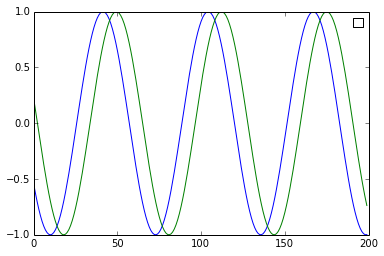

In [5]:
#build data set 
(train_x,train_y,test_x,test_y) = build_data(LENGTH)
print (train_x.shape,train_y.shape,test_x.shape,test_y.shape)
# check the ooutput shape , x is TWO dimension ,each time input LENGTH x and output ONE y .


%matplotlib inline
fig=plt.figure()
plot_train = plt.plot(train_y[:200],label='train_y')
plot_test = plt.plot(test_y[:200],label='test_y')
plt.legend([plot_train,plot_test],['predicted','real_sin'])
plt.show()

In [6]:
# Basic RNN model
def seq_predict_model(X,w,b,TIME_STEP_SIZE,VECTOR_SIZE):
    X = tf.transpose(X,[1,0,2])
    X = tf.reshape(X,[-1,VECTOR_SIZE])
    X = tf.split(X,TIME_STEP_SIZE,0)
    
    cell = core_rnn_cell.BasicRNNCell(num_units= LENGTH)
    initial_state = tf.zeros([BATCH_SIZE,cell.state_size])
    outputs,_states = core_rnn.static_rnn(cell,X,initial_state=initial_state)
    
    return tf.matmul(outputs[-1],w)+b,cell.state_size


In [7]:
#LSTM RNN model
def seq_predict_LSTM_model(X,w,b,TIME_STEP_SIZE,VECTOR_SIZE):
    X = tf.transpose(X,[1,0,2])
    X = tf.reshape(X,[-1,VECTOR_SIZE])
    X = tf.split(X,TIME_STEP_SIZE,0)
    
    cell = core_rnn_cell.BasicLSTMCell(num_units= LENGTH,forget_bias=1.0,state_is_tuple=True)
    outputs,_states = core_rnn.static_rnn(cell,X,dtype=tf.float32)
    
    return tf.matmul(outputs[-1],w)+b,cell.state_size

In [8]:
pred_y,_ = seq_predict_model(X,W,B,TIME_STEP_SIZE,VECTOR_SIZE)
#pred_y,_ = seq_predict_LSTM_model(X,W,B,TIME_STEP_SIZE,VECTOR_SIZE)

In [9]:
loss = tf.square(tf.subtract(Y,pred_y))
train_op = tf.train.GradientDescentOptimizer(0.003).minimize(loss) # default 0.01

In [10]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

('RUN 0', 0.00051356351)
('RUN 1', 0.00022728427)
('RUN 2', 0.0001983976)
('RUN 3', 0.00014984442)
('RUN 4', 0.00012274858)
('RUN 5', 6.172651e-05)
('RUN 6', 8.7327142e-05)
('RUN 7', 3.968782e-05)
('RUN 8', 5.7158548e-05)
('RUN 9', 4.8748047e-05)
('RUN 10', 5.7281712e-05)
('RUN 11', 4.979903e-05)
('RUN 12', 3.4292447e-05)
('RUN 13', 4.8608301e-05)
('RUN 14', 3.1110412e-05)
('RUN 15', 2.9631619e-05)
('RUN 16', 3.7849371e-05)
('RUN 17', 1.7310129e-05)
('RUN 18', 2.0861964e-05)
('RUN 19', 2.0513138e-05)
('RUN 20', 2.5115511e-05)
('RUN 21', 2.007341e-05)
('RUN 22', 2.6220747e-05)
('RUN 23', 2.0841802e-05)
('RUN 24', 1.7187765e-05)
('RUN 25', 2.1457501e-05)
('RUN 26', 1.5173585e-05)
('RUN 27', 1.4095955e-05)
('RUN 28', 8.1301314e-06)
('RUN 29', 1.1659721e-05)
('RUN 30', 9.7907605e-06)
('RUN 31', 9.0059639e-06)
('RUN 32', 1.0950403e-05)
('RUN 33', 5.3250806e-06)
('RUN 34', 3.4262259e-06)
('RUN 35', 7.6320284e-06)
('RUN 36', 6.713024e-06)
('RUN 37', 4.8870183e-06)
('RUN 38', 2.8837549e-06)
('

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119ac1990>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


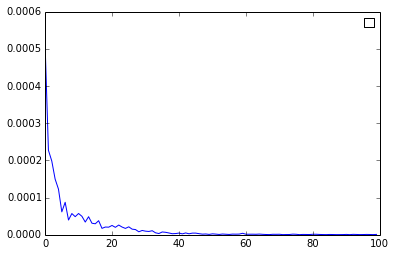

In [11]:
loss_p=[]
for i in range(100): #default 50
    for end in range(BATCH_SIZE,len(train_x),BATCH_SIZE):
        begin = end - BATCH_SIZE
        x_value = train_x[begin:end]
        y_value = train_y[begin:end]
        
        sess.run(train_op,feed_dict={X:x_value,Y:y_value})
        
        test_indices = np.arange(len(test_x))
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:TEST_SIZE]
        #print test_indices
        x_value = test_x[test_indices]
        y_value = test_y[test_indices]
        
        val_loss = np.mean(sess.run(loss,feed_dict={X:x_value,Y:y_value}))
        
    print ('RUN %s'%i ,val_loss)
    loss_p.append(val_loss)
%matplotlib inline
fig_loss=plt.figure()
plot_loss = plt.plot(loss_p,label='loss')
plt.legend([plot_loss],['loss'])
plt.show()
    

In [12]:
index=[1,2,3,4,5,6,7,8,9,10]
next_y=sess.run(pred_y,feed_dict={X:test_x[index]})

In [13]:
next_y1=[[]]
print test_x[index]
print next_y
next_y1[0]=next_y
print next_y1

[[[-0.64149643]
  [ 0.29891229]
  [ 0.96450243]
  [ 0.74333348]
  [-0.16125284]
  [-0.91758404]
  [-0.83029271]
  [ 0.02036591]
  [ 0.85230021]
  [ 0.90063362]]

 [[-0.56170681]
  [ 0.39268806]
  [ 0.98604734]
  [ 0.67283924]
  [-0.25897416]
  [-0.95268791]
  [-0.77050479]
  [ 0.12007688]
  [ 0.90026042]
  [ 0.85274868]]

 [[-0.4763048 ]
  [ 0.48254023]
  [ 0.99773999]
  [ 0.59562221]
  [-0.35410789]
  [-0.97827283]
  [-0.70301824]
  [ 0.21858808]
  [ 0.93922552]
  [ 0.79634335]]

 [[-0.3861437 ]
  [ 0.56757101]
  [ 0.99946356]
  [ 0.51245392]
  [-0.44570349]
  [-0.99408317]
  [-0.62850736]
  [ 0.31491521]
  [ 0.96880619]
  [ 0.73198123]]

 [[-0.29212439]
  [ 0.64693082]
  [ 0.99120082]
  [ 0.42416536]
  [-0.53284577]
  [-0.99996096]
  [-0.54771665]
  [ 0.40809582]
  [ 0.98870688]
  [ 0.66030539]]

 [[-0.19518627]
  [ 0.7198267 ]
  [ 0.97303432]
  [ 0.33163868]
  [-0.61466404]
  [-0.99584747]
  [-0.46145333]
  [ 0.49719887]
  [ 0.99872873]
  [ 0.582032  ]]

 [[-0.09629791]
  [ 0.785530

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119c8e2d0>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119c8e050>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


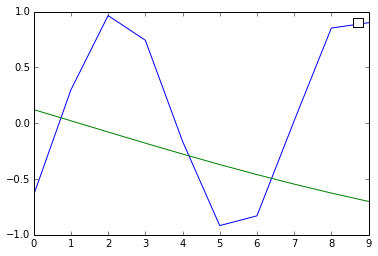

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119dad050>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119d9cd90>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


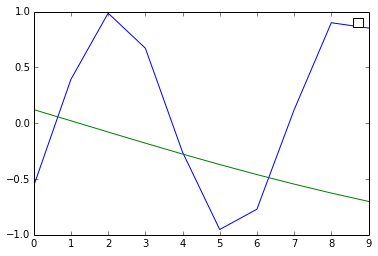

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119c8edd0>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119acf910>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


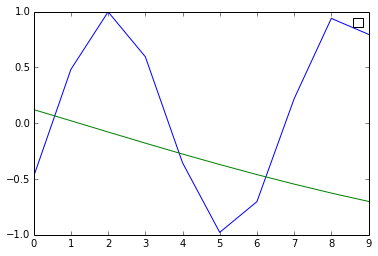

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119d9c790>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119d9c910>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


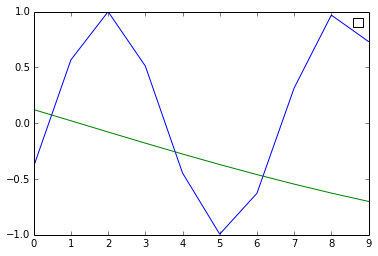

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119ce8ed0>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119ce87d0>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


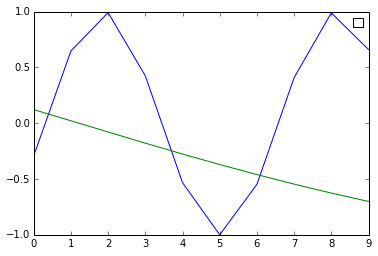

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119d743d0>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119d74150>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


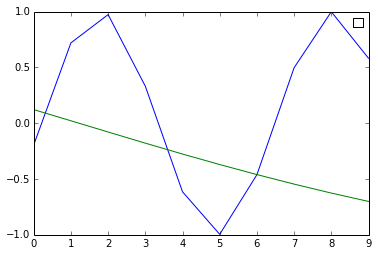

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119cd6210>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119cd63d0>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


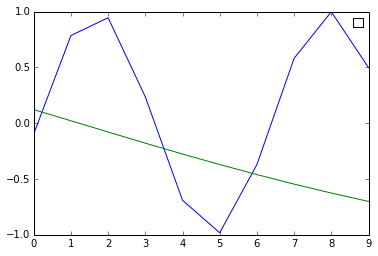

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119d5fb50>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119b1ce50>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


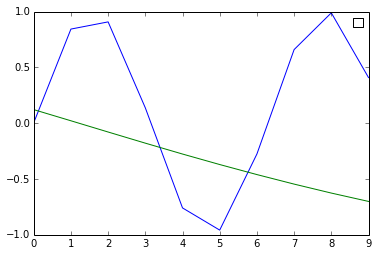

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119c3a310>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119c3aad0>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


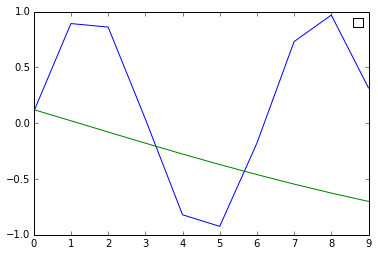

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119bfe090>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119c7fc90>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


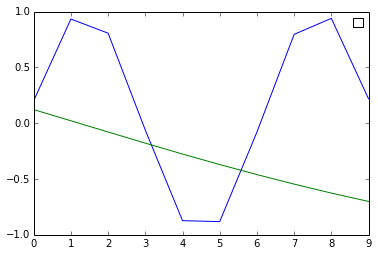

In [14]:
for i in range(10): 
    %matplotlib inline
    fig_pred=plt.figure()
    plot_input = plt.plot(test_x[index][i],label='input')
    plot_pred = plt.plot(next_y,label='pred')
    plt.legend([plot_pred,plot_input],['pred','input'])
    plt.show()

In [15]:
pred_input_indexes = []
for j in range(BATCH_SIZE*2):
    input_index = []
    for i in range(LENGTH):
        input_index.append(j+i)
    pred_input_indexes.append(input_index)
    
print pred_input_indexes

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22], [14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26], [18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [19, 20, 21, 22, 23, 24, 25, 26, 27, 28]]


In [22]:
next_Y =[]
#from test data set generate first batch predicted data
for m in range(BATCH_SIZE*2):    
    next_y=sess.run(pred_y,feed_dict={X:test_x[pred_input_indexes[m]]})
    next_Y.append(next_y)
    print pred_input_indexes[m]
print next_Y
plot_y = []
#from predicted data generate further predict data ,repeatable forwarding 
for i in range(1000):
    next_y=sess.run(pred_y,feed_dict={X:next_Y[i:i+10]})
    next_Y.append(next_y)
    plot_y.append(next_y[-1])
    print next_y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[array([[ 0.21993241],
       [ 0.12173193],
       [ 0.02171372],
       [-0.07896043],
       [-0.17877707],
       [-0.27628747],
       [-0.37039968],
       [-0.46038181],
       [-0.5457316 ],
       [-0.62605846]], dtype=float32

[[-0.91159284]
 [-0.49027562]
 [ 0.17199147]
 [ 0.64632237]
 [ 0.91242552]
 [ 0.60900295]
 [-0.06701741]
 [-0.57360673]
 [-0.89348936]
 [-0.71424568]]
[[-0.49027562]
 [ 0.17199147]
 [ 0.64632237]
 [ 0.91242552]
 [ 0.60900295]
 [-0.06701741]
 [-0.57360673]
 [-0.89348936]
 [-0.71424568]
 [-0.05105149]]
[[ 0.17199147]
 [ 0.64632237]
 [ 0.91242552]
 [ 0.60900295]
 [-0.06701741]
 [-0.57360673]
 [-0.89348936]
 [-0.71424562]
 [-0.05105149]
 [ 0.49374181]]
[[ 0.64632237]
 [ 0.91242552]
 [ 0.60900295]
 [-0.06701741]
 [-0.57360673]
 [-0.89348936]
 [-0.71424562]
 [-0.0510514 ]
 [ 0.49374181]
 [ 0.85821015]]
[[ 0.91242552]
 [ 0.60900295]
 [-0.06701741]
 [-0.57360673]
 [-0.89348936]
 [-0.71424562]
 [-0.0510514 ]
 [ 0.49374193]
 [ 0.85821015]
 [ 0.80252022]]
[[ 0.60900295]
 [-0.06701741]
 [-0.57360673]
 [-0.89348936]
 [-0.71424562]
 [-0.0510514 ]
 [ 0.49374193]
 [ 0.85821015]
 [ 0.80252022]
 [ 0.17284507]]
[[-0.06701741]
 [-0.57360673]
 [-0.89348936]
 [-0.71424562]
 [-0.0510514 ]
 [ 0.49374193]
 [ 0

[[-0.80036038]
 [-0.17054707]
 [ 0.4133158 ]
 [ 0.8107509 ]
 [ 0.863213  ]
 [ 0.29491392]
 [-0.3256588 ]
 [-0.75130326]
 [-0.90080827]
 [-0.42291981]]
[[-0.17054707]
 [ 0.4133158 ]
 [ 0.8107509 ]
 [ 0.863213  ]
 [ 0.29491392]
 [-0.3256588 ]
 [-0.75130326]
 [-0.90080827]
 [-0.42291981]
 [ 0.22643107]]
[[ 0.4133158 ]
 [ 0.8107509 ]
 [ 0.863213  ]
 [ 0.29491392]
 [-0.3256588 ]
 [-0.75130326]
 [-0.90080827]
 [-0.42291975]
 [ 0.22643107]
 [ 0.68295932]]
[[ 0.8107509 ]
 [ 0.863213  ]
 [ 0.29491392]
 [-0.3256588 ]
 [-0.75130326]
 [-0.90080827]
 [-0.42291975]
 [ 0.22643107]
 [ 0.68295932]
 [ 0.91398299]]
[[ 0.863213  ]
 [ 0.29491392]
 [-0.3256588 ]
 [-0.75130326]
 [-0.90080827]
 [-0.42291975]
 [ 0.22643107]
 [ 0.68295944]
 [ 0.91398299]
 [ 0.54849118]]
[[ 0.29491392]
 [-0.3256588 ]
 [-0.75130326]
 [-0.90080827]
 [-0.42291975]
 [ 0.22643107]
 [ 0.68295944]
 [ 0.91398293]
 [ 0.54849118]
 [-0.12225955]]
[[-0.3256588 ]
 [-0.75130326]
 [-0.90080827]
 [-0.42291975]
 [ 0.22643107]
 [ 0.68295944]
 [ 0

[[-0.53678244]
 [-0.87936527]
 [-0.75871569]
 [-0.10764956]
 [ 0.45641485]
 [ 0.8374182 ]
 [ 0.83406311]
 [ 0.22961834]
 [-0.37269437]
 [-0.78336257]]
[[-0.87936527]
 [-0.75871569]
 [-0.10764956]
 [ 0.45641485]
 [ 0.8374182 ]
 [ 0.83406311]
 [ 0.22961834]
 [-0.37269437]
 [-0.78336257]
 [-0.88437921]]
[[-0.75871569]
 [-0.10764956]
 [ 0.45641485]
 [ 0.8374182 ]
 [ 0.83406311]
 [ 0.22961834]
 [-0.37269437]
 [-0.78336251]
 [-0.88437921]
 [-0.35710278]]
[[-0.10764956]
 [ 0.45641485]
 [ 0.8374182 ]
 [ 0.83406311]
 [ 0.22961834]
 [-0.37269437]
 [-0.78336251]
 [-0.88437921]
 [-0.35710278]
 [ 0.27791995]]
[[ 0.45641485]
 [ 0.8374182 ]
 [ 0.83406311]
 [ 0.22961834]
 [-0.37269437]
 [-0.78336251]
 [-0.88437921]
 [-0.35710278]
 [ 0.27791995]
 [ 0.71880025]]
[[ 0.8374182 ]
 [ 0.83406311]
 [ 0.22961834]
 [-0.37269437]
 [-0.78336251]
 [-0.88437921]
 [-0.35710278]
 [ 0.27791998]
 [ 0.71880025]
 [ 0.91016614]]
[[ 0.83406311]
 [ 0.22961834]
 [-0.37269437]
 [-0.78336251]
 [-0.88437921]
 [-0.35710278]
 [ 0

[[-0.04608956]
 [ 0.4979313 ]
 [ 0.86068392]
 [ 0.79846674]
 [ 0.16539288]
 [-0.41751254]
 [-0.81282198]
 [-0.86127824]
 [-0.2914589 ]
 [ 0.32714307]]
[[ 0.4979313 ]
 [ 0.86068392]
 [ 0.79846674]
 [ 0.16539288]
 [-0.41751254]
 [-0.81282198]
 [-0.86127824]
 [-0.29145879]
 [ 0.32714307]
 [ 0.75296038]]
[[ 0.86068392]
 [ 0.79846674]
 [ 0.16539288]
 [-0.41751254]
 [-0.81282198]
 [-0.86127824]
 [-0.29145879]
 [ 0.32714304]
 [ 0.75296038]
 [ 0.9000383 ]]
[[ 0.79846674]
 [ 0.16539288]
 [-0.41751254]
 [-0.81282198]
 [-0.86127824]
 [-0.29145879]
 [ 0.32714304]
 [ 0.75296044]
 [ 0.9000383 ]
 [ 0.41878757]]
[[ 0.16539288]
 [-0.41751254]
 [-0.81282198]
 [-0.86127824]
 [-0.29145879]
 [ 0.32714304]
 [ 0.75296044]
 [ 0.9000383 ]
 [ 0.41878757]
 [-0.23124659]]
[[-0.41751254]
 [-0.81282198]
 [-0.86127824]
 [-0.29145879]
 [ 0.32714304]
 [ 0.75296044]
 [ 0.9000383 ]
 [ 0.41878769]
 [-0.23124659]
 [-0.68586677]]
[[-0.81282198]
 [-0.86127824]
 [-0.29145879]
 [ 0.32714304]
 [ 0.75296044]
 [ 0.9000383 ]
 [ 0

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:613: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x119cc6290>]
Use proxy artist instead.

http://matplotlib.sourceforge.net/users/legend_guide.html#using-proxy-artist

  (str(orig_handle),))


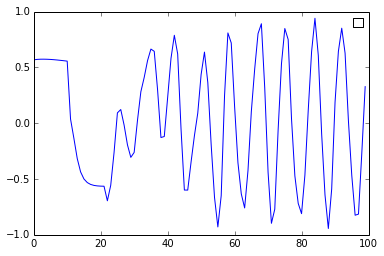

In [24]:
%matplotlib inline
fig_pred_y=plt.figure()
plot_pred = plt.plot(plot_y[:100],label='pred')
plt.legend([plot_pred],['pred'])
plt.show()